In [145]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import lasso_path, enet_path
from itertools import cycle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

Загрузка датасета:

In [3]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Задание 2

# Lenear regression

In [4]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [7]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [8]:
regr = linear_model.LinearRegression()

In [9]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [10]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [11]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [938.23786125]


In [12]:
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07


In [13]:
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.47


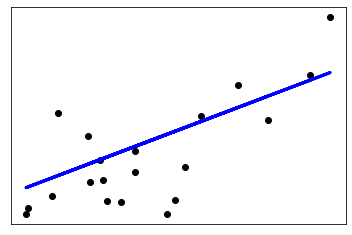

In [16]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

# Lasso

In [18]:
X, y = datasets.load_diabetes(return_X_y=True)

In [20]:
X /= X.std(axis=0)
eps = 5e-3

In [21]:
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

Computing regularization path using the lasso...


In [22]:
print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)

Computing regularization path using the positive lasso...


(-1.7698057217366596,
 0.7613272734937198,
 -14.945497919816344,
 29.786449873438382)

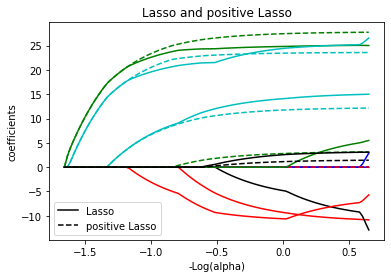

In [35]:
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")


In [47]:
lasso_regression = Lasso(alpha=0.1) # alpha — величина регуляризации
lasso_regression.fit(diabetes_X_train, diabetes_y_train)

print(lasso_regression.predict(diabetes_X_test))

[222.555919   117.5179281  162.80953886 116.55427681 122.33618457
 157.99128239 232.19243193 123.29983586 102.09950742 125.22713844
 202.31924185  99.20855354 154.13667722 131.97269749  86.68108674
 170.5187492  138.71825654 138.71825654 187.86447246  87.64473803]


Точность предсказания для данного датасета и параметров

In [48]:
print(lasso_regression.score(diabetes_X_test, diabetes_y_test))

0.4612946822333609


In [148]:
n_alpha=[0.000001,0.01,0.1,1,10,100,10000]
n=0
print("ALpha".ljust(6), "MSE")
for a in n_alpha:
    lasso_regression = Lasso(n_alpha[n])  # alpha — величина регуляризации
    lasso_regression.fit(diabetes_X_train, diabetes_y_train)
    lasso_pred = lasso_regression.predict(diabetes_X_test)
    print(str(n_alpha[n]).ljust(6), mean_squared_error(diabetes_X_test, lasso_pred))
    n+=1

ALpha  MSE
1e-06  22466.228067328815
0.01   22462.04548494801
0.1    22428.295519428153
1      22476.606742530676
10     23523.137382401655
100    23523.137382401655
10000  23523.137382401655


# Elastic Net

In [31]:
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

Computing regularization path using the elastic net...


In [33]:
print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
    )

Computing regularization path using the positive elastic net...


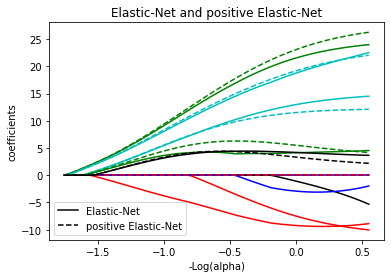

In [36]:
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_enet = -np.log10(alphas_enet)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

In [147]:
n_alpha=[0.000001,0.01,0.1,1,10,100,10000]
n=0
print("ALpha".ljust(6), "MSE")
for a in n_alpha:
    enet_regression = ElasticNet(n_alpha[n])  # alpha — величина регуляризации
    enet_regression.fit(diabetes_X_train, diabetes_y_train)
    enet_pred = enet_regression.predict(diabetes_X_test)
    print(str(n_alpha[n]).ljust(6), mean_squared_error(diabetes_X_test, enet_pred))
    n+=1

ALpha  MSE
1e-06  22466.0301538985
0.01   22775.538863594462
0.1    23399.20455160861
1      23512.776292272374
10     23523.137382401655
100    23523.137382401655
10000  23523.137382401655


# Ridge

In [146]:
n_alpha=[0.000001,0.01,0.1,1,10,100,10000]
n=0
print("ALpha".ljust(6), "MSE")
for a in n_alpha:
    ridge_regression = Ridge(n_alpha[n])  # alpha — величина регуляризации
    ridge_regression.fit(diabetes_X_train, diabetes_y_train)
    ridge_pred = ridge_regression.predict(diabetes_X_test)
    print(str(n_alpha[n]).ljust(6), mean_squared_error(diabetes_X_test, ridge_pred))
    n+=1

ALpha  MSE
1e-06  22466.22755032224
0.01   22457.1390258265
0.1    22398.70644196037
1      22518.18191460282
10     23275.286923922413
100    23494.801599955077
10000  23522.849593352457
